In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

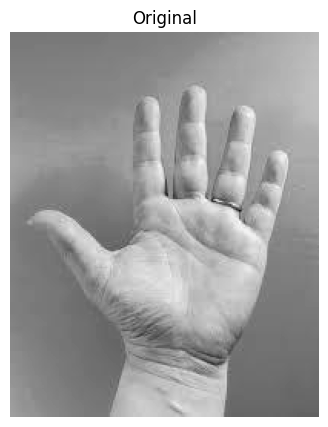

In [2]:
img = cv2.imread("data/contour.jpg", 0)

plt.figure(figsize=(5,5)), plt.title("Original"), plt.imshow(img, cmap="gray"), plt.axis("off");

In [7]:
img = cv2.imread("data/contour.jpg", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Image not loaded. Check the file path.")

In [17]:
img_blur = cv2.GaussianBlur(img, (3, 3), 0)

In [18]:
img_blur = cv2.medianBlur(img, 3)

In [19]:
img_thresh = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                   cv2.THRESH_BINARY, 11, 2)
if img_thresh is None:
    raise ValueError("Thresholding failed.")

In [20]:
edges = cv2.Canny(img, 50, 150)
contours, hierarch = cv2.findContours(edges, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

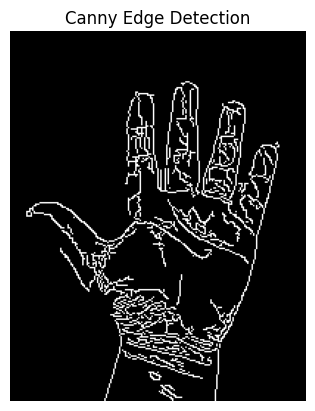

In [21]:
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()

In [22]:
# Dilation and erosion to close small gaps in contours
kernel = np.ones((3, 3), np.uint8)
img_clean = cv2.morphologyEx(img_thresh, cv2.MORPH_CLOSE, kernel)

In [23]:
print(f"Number of contours detected: {len(contours)}")

Number of contours detected: 101


# Find Contour

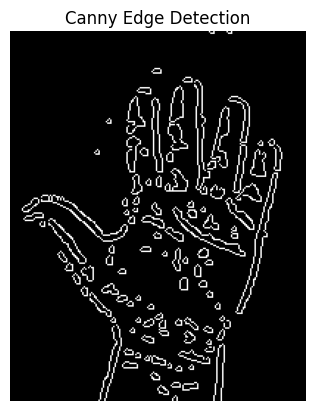

Number of contours detected: 193


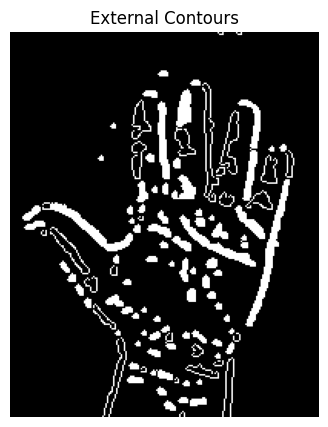

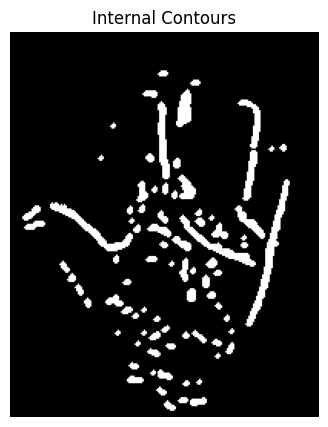

In [26]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Load the image in grayscale
img = cv2.imread("data/contour.jpg", cv2.IMREAD_GRAYSCALE)
if img is None:
    raise ValueError("Error: Image not loaded. Check the file path.")

# Step 1: Apply median blur to reduce noise while preserving edges
img_blur = cv2.medianBlur(img, 3)

# Step 2: Apply adaptive thresholding
img_thresh = cv2.adaptiveThreshold(img_blur, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, 
                                   cv2.THRESH_BINARY, 11, 2)

# Step 3: Optional - Apply morphological operations to clean up small gaps
kernel = np.ones((3, 3), np.uint8)
img_clean = cv2.morphologyEx(img_thresh, cv2.MORPH_CLOSE, kernel)

# Step 4: Find contours using Canny edges
edges = cv2.Canny(img_clean, 50, 150)
contours, hierarch = cv2.findContours(edges, cv2.RETR_CCOMP, cv2.CHAIN_APPROX_SIMPLE)

# Step 5: Display the edge-detected image
plt.imshow(edges, cmap='gray')
plt.title("Canny Edge Detection")
plt.axis('off')
plt.show()

# Step 6: Check number of contours and draw them
print(f"Number of contours detected: {len(contours)}")

# Draw external and internal contours
external_contour = np.zeros(img.shape, dtype=np.uint8)
internal_contour = np.zeros(img.shape, dtype=np.uint8)

for i in range(len(contours)):
    if hierarch[0][i][3] == -1:  # External contour
        cv2.drawContours(external_contour, contours, i, 255, -1)
    else:  # Internal contour
        cv2.drawContours(internal_contour, contours, i, 255, -1)

# Display results
plt.figure(figsize=(5, 5))
plt.imshow(external_contour, cmap='gray')
plt.title("External Contours")
plt.axis('off')
plt.show()

plt.figure(figsize=(5, 5))
plt.imshow(internal_contour, cmap='gray')
plt.title("Internal Contours")
plt.axis('off')
plt.show()
